# Growth 

## Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# adjust default options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

## Define viral growth function

$\qquad$ $U(t) = U_0 \times \dfrac{k^{t/c + 1} - 1}{k - 1}$ $\qquad$ $(\textbf{1})$

In [3]:
# create function for calculating number of users given inputs
def user_growth(user_base, viral_coeff, cycle_time, time_elapsed):
    output = user_base*((viral_coeff ** ((time_elapsed/cycle_time) + 1) - 1)/(viral_coeff - 1))
    return output

In [4]:
# create array for x-values (time)
t = np.arange(0, 100, 1)
# t

## Create user base vs. time for several (k, c) cases

In [5]:
# create arrays for several cases
users_k0p5_c10 = []
users_k1_c10 = []
users_k2_c10 = []
users_k2_c5 = []
users_k2_c15 = []
for i in t:
    users_k0p5_c10.append(user_growth(1, 0.5, 10, i))
    users_k1_c10.append(user_growth(1, 1.001, 10, i))    
    users_k2_c10.append(user_growth(1, 2, 10, i))
    users_k2_c5.append(user_growth(1, 2, 5, i))
    users_k2_c15.append(user_growth(1, 2, 15, i))

In [6]:
# compile data into dataframe
viral_growth = pd.DataFrame({'time (days)': t,
                             'k0.5, c10': users_k0p5_c10,
                             'k1, c10': users_k1_c10,
                             'k2, c10': users_k2_c10,
                             'k2, c5': users_k2_c5,
                             'k2, c15': users_k2_c15})

# viral_growth.style.hide_index()

## Visualize users vs. time for selected values of k and c

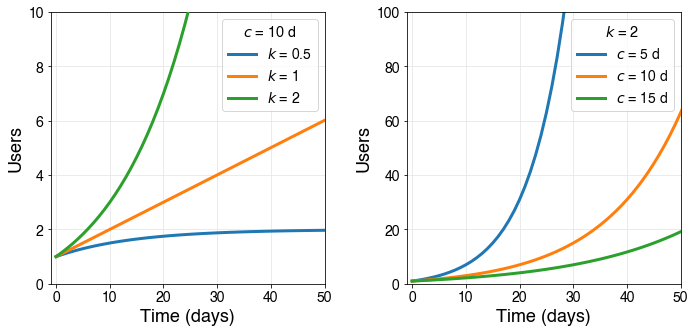

In [18]:
# plot result
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# stipulate data of interest
x = viral_growth['time (days)']
y1 = viral_growth['k0.5, c10']
y2 = viral_growth['k1, c10']
y3 = viral_growth['k2, c10']
y4 = viral_growth['k2, c5']
y5 = viral_growth['k2, c15']

# plot k variation
axes[0].plot(x, y1, linewidth=3, zorder= 1, label='$k$ = 0.5')
axes[0].plot(x, y2, linewidth=3, zorder= 3, label='$k$ = 1')
axes[0].plot(x, y3, linewidth=3, zorder= 5, label='$k$ = 2')

# set limits
axes[0].set_xlim(-1, 50)
axes[0].set_ylim(0, 10)
axes[0].set_yticks(np.arange(0, 11, 2))

# set legend, plot properties
l = axes[0].legend(prop={'size': 14}, title='$c$ = 10 d')
plt.setp(l.texts, family='Helvetica')
plt.setp(l.get_title(),fontsize='x-large')

axes[0].set_xlabel('Time (days)', fontsize=18, fontname='Helvetica')
axes[0].set_ylabel('Users', fontsize=18, fontname='Helvetica')
axes[0].tick_params(axis = 'x', labelsize = 14)
axes[0].tick_params(axis = 'y', labelsize = 14)
axes[0].grid(color=(.9, .9, .9)); axes[0].set_axisbelow(True)

# plot c variation
axes[1].plot(x, y4, linewidth=3, zorder= 1, label='$c$ = 5 d')
axes[1].plot(x, y3, linewidth=3, zorder= 3, label='$c$ = 10 d')
axes[1].plot(x, y5, linewidth=3, zorder= 5, label='$c$ = 15 d')

# set limits
axes[1].set_xlim(-1, 50)
axes[1].set_ylim(0, 100)
axes[1].set_yticks(np.arange(0, 101, 20))

# set legend, plot properties
l2 = axes[1].legend(prop={'size': 14}, title='$k$ = 2')
plt.setp(l2.texts, family='Helvetica')
plt.setp(l2.get_title(),fontsize='x-large')

axes[1].set_xlabel('Time (days)', fontsize=18, fontname='Helvetica')
axes[1].set_ylabel('Users', fontsize=18, fontname='Helvetica')
axes[1].tick_params(axis = 'x', labelsize = 14)
axes[1].tick_params(axis = 'y', labelsize = 14)
axes[1].grid(color=(.9, .9, .9)); axes[1].set_axisbelow(True)

# save, display plot
plt.subplots_adjust(wspace=0.3, left=0.075, right=0.95)
# plt.savefig('./Images/viral_growth_k_c.png', dpi=400)
plt.show()

# Retention

## Active user definition

In [19]:
# create active user definition table
active_user_defs = pd.DataFrame({'Company': ['Facebook', 'Twitter', 'Uber', 'Square', 'Netflix', 'Amazon'],
#                                  'Revenue source': ['Advertising', 'Advertising', 'Commissions', 'Commissions', 'Commissions'],
                                 'Active user action': ['Liking, commenting, messaging, etc.', 
                                            'Logging in',
                                            'Receiving a ride or meal delivery',
                                            'Sending or receiving money', 
                                            'Maintaining a subscription', 
                                            'Making a purchase'],
                                 'Time interval': ['Daily', 'Daily', 'Monthly', 'Monthly', 'Monthly', 'Yearly'],
                                 'Count (millions, 2020)': ['1,734', '166', '111', '24', '182', '310']})
active_user_defs.style.hide_index()

Company,Active user action,Time interval,"Count (millions, 2020)"
Facebook,"Liking, commenting, messaging, etc.",Daily,"1,734"
Twitter,Logging in,Daily,166
Uber,Receiving a ride or meal delivery,Monthly,111
Square,Sending or receiving money,Monthly,24
Netflix,Maintaining a subscription,Monthly,182
Amazon,Making a purchase,Yearly,310


## User retention logs

In [20]:
# create retention data table

retention_table = pd.DataFrame({'Date': ['1/1', '1/2', '1/3', '1/4'],
                                'User 1': [1, 1, 1, 1],
                                'User 2': [1, 1, 1, 0],
                                'User 3': ['-', 1, 1, 0],
                                'User 4': ['-', '-', 1, 0],
                                'Active users': [2, 3, 4, 1]
                               })

retention_table.style.hide_index()

Date,User 1,User 2,User 3,User 4,Active users
1/1,1,1,-,-,2
1/2,1,1,1,-,3
1/3,1,1,1,1,4
1/4,1,0,0,0,1


In [21]:
# create retention data table

retention_table = pd.DataFrame({'Day': [0, 1, 2, 3],
                                'User 1': [1, 1, 1, 1],
                                'User 2': [1, 1, 1, 0],
                                'User 3': [1, 1, 0, '-'],
                                'User 4': [1, 0, '-', '-'],
                                'Active users': [4, 3, 2, 1],
                                'Retention (%)': [100, 75, 67, 50]
                               })

retention_table.style.hide_index()

Day,User 1,User 2,User 3,User 4,Active users,Retention (%)
0,1,1,1,1,4,100
1,1,1,1,0,3,75
2,1,1,0,-,2,67
3,1,0,-,-,1,50


In [22]:
columns = [np.array(['', '', 'Retention (%)', 'Retention (%)', 'Retention (%)', 'Retention (%)']),
          np.array(['Month', 'New users', 'Day 1', 'Day 2', 'Day 3', 'Day 4'])]

data = np.array([['1/20', 120, 33, 25, 18, 14], 
                 ['2/20', 135, 50, 33, 25, 18], 
                 ['3/20', 125, 60, 50, 33, 25], 
                 ['4/20', 145, 67, 60, 50, 33]])

df = pd.DataFrame(data, columns=columns)
df.style.hide_index()
# np.array(data)

In [23]:
heading_properties = [('font-size', '16px')]
cell_properties = [('font-size', '16px')]
dfstyle = dict(selector='th', props=('max-width', '1px'))
df.style.set_table_styles(dfstyle)

## Plot retention curves

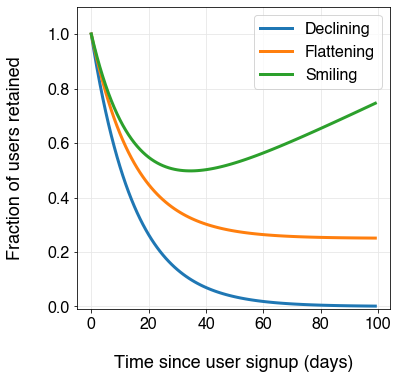

In [40]:
# create retention curve plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,6))
x = np.arange(0,100,1)
y1 = 1*np.exp(-x/15)
y2 = 0.75*np.exp(-x/15) + 0.25
y3 = 0.75*np.exp(-x/15) + 0.25 + 0.005*x
plt.plot(x, y1, linewidth=3, label='Declining')
plt.plot(x, y2, linewidth=3, label='Flattening')
plt.plot(x, y3, linewidth=3, label='Smiling')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
# ax.get_xaxis().set_ticks([0, 28, 56, 84])
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(prop={'size': 16})
plt.setp(l.texts, family='Helvetica')
plt.subplots_adjust(left = 0.23, right = 0.85, bottom = 0.2, top = 0.9)
figure_name = './Images/retention archetypes.png' 
plt.grid(color=(.9, .9, .9))
# plt.tight_layout()
plt.savefig(figure_name, dpi = 600)
plt.show()

In [ ]:
# shifted beta geometric
def sBG_function(x, a, b):
    return (b + x - 1) / (a + b + x - 1)

popt_sBG, pcov = curve_fit(sBG_function, x[1:limit+1], r[1:limit+1], absolute_sigma=False, maxfev=1000)
popt_sBG

In [289]:
# create a more realistic set of retention curves using the sBG model
x = np.arange(0, 101, 1)

# declining
r1 = sBG_function(x, a=0.75, b=1.5)
r1[0] = np.nan
y1 = pd.DataFrame({'Time': x,
                   'R': r1})
y1['S'] = y1['R'].cumprod() + np.random.normal(0,0.015,101)
y1['S'].iloc[0] = 1
# plt.plot(y1['S'], linestyle='-', marker='o')

# flattening
r2 = sBG_function(x, a=0.3, b=1.5)
r2[0] = np.nan
y2 = pd.DataFrame({'Time': x,
                   'R': r2})
y2['S'] = y2['R'].cumprod()*np.random.normal(1,0.05,101)
y2['S'].iloc[0] = 1
# plt.plot(y1['S'], linestyle='-', marker='o')

# smiling
r3 = sBG_function(x, a=0.25, b=1.5)
r3[0] = np.nan
y3 = pd.DataFrame({'Time': x,
                   'R': r3})
y3['S'] = (y1['R'].cumprod() + 0.1*x**0.25 + 0.005*x**1 - 0.00025*x**1.5)*np.random.normal(1,0.05,101) 
y3['S'].iloc[0] = 1
# plt.plot(y3['S'], linestyle='-', marker='o')

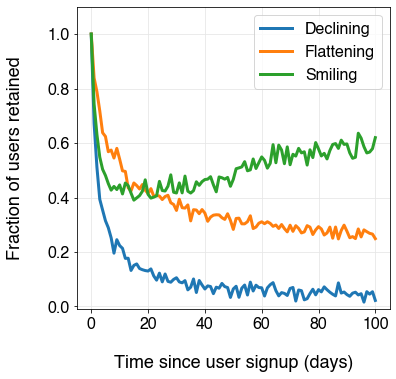

In [291]:
# create retention curve plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,6))
plt.plot(x, y1['S'], linewidth=3, label='Declining')
plt.plot(x, y2['S'], linewidth=3, label='Flattening')
plt.plot(x, y3['S'], linewidth=3, label='Smiling')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
ax.get_xaxis().set_ticks([0, 20, 40, 60, 80, 100])
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(prop={'size': 16})
plt.setp(l.texts, family='Helvetica')
plt.subplots_adjust(left = 0.23, right = 0.85, bottom = 0.2, top = 0.9)
figure_name = './Images/Figures/retention archetypes.png' 
plt.grid(color=(.9, .9, .9))
# plt.tight_layout()
plt.savefig(figure_name, dpi = 600)
plt.show()

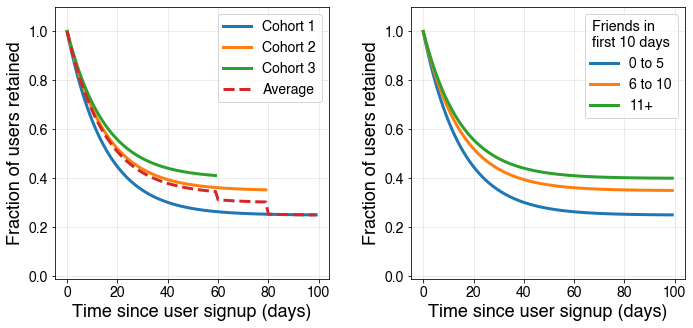

In [25]:
plt.rcParams["font.family"] = "Helvetica"

# plot result
plt.rcParams["font.family"] = "Helvetica"
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# create improving retention with cohort plot
x = np.arange(0,100,1)
y1 = 0.75*np.exp(-x/15) + 0.25
y2 = 0.65*np.exp(-x[:80]/15) + 0.35
y3 = 0.60*np.exp(-x[:60]/15) + 0.40
y4 = np.zeros(100)
y4[:60] = (y1[:60] + y2[:60] + y3)/3
y4[60:80] = (y1[60:80] + y2[60:80])/2
y4[80:] = y1[80:]

axes[0].plot(x, y1, linewidth=3, label='Cohort 1')
axes[0].plot(x[:80], y2, linewidth=3, label='Cohort 2')
axes[0].plot(x[:60], y3, linewidth=3, label='Cohort 3')
axes[0].plot(x, y4, '--', linewidth=3, label='Average')
axes[0].set_xlabel('Time since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylabel('Fraction of users retained', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[0].set_ylim(-0.01,1.1)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].grid(color=(.9, .9, .9))
l = axes[0].legend(prop={'size': 14})
plt.setp(l.texts, family='Helvetica')

# create improving retention with increasing friends plot
y5 = 0.75*np.exp(-x/15) + 0.25
y6 = 0.65*np.exp(-x/15) + 0.35
y7 = 0.60*np.exp(-x/15) + 0.40

axes[1].plot(x, y5, linewidth=3, label='0 to 5')
axes[1].plot(x, y6, linewidth=3, label='6 to 10')
axes[1].plot(x, y7, linewidth=3, label='11+')
axes[1].set_xlabel('Time since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylabel('Fraction of users retained', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes[1].set_ylim(-0.01,1.1)
axes[1].tick_params(axis='both', which='major', labelsize=14)
l = plt.legend(title='Friends in \nfirst 10 days', prop={'size': 14})
axes[1].grid(color=(.9, .9, .9))
plt.setp(l.get_title(),fontsize='x-large', fontname='Helvetica')
plt.setp(l.texts, family='Helvetica')

# save, display plot
plt.subplots_adjust(wspace=0.3, left=0.075, right=0.95)
# plt.savefig('./Images/Cohort_analysis.png', dpi=400)
plt.show()

## Modeling retention with shifted beta distribution

In [490]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# colors

In [491]:
# create time (x) and retention (s) variables
x = np.arange(0, 13, 1)
s = [1, 0.839, 0.733, 0.653, 0.593, 0.551, 0.517, 0.491, 0.468, 0.445, 0.427, 0.409, 0.394]

In [492]:
# create instantaneous retention (r) from overall retention (s)
r = [np.nan]
for counter, i in enumerate(s):
    if counter > 0:
        r.append(round(i/s[counter-1], 3))

In [493]:
r

[nan,
 0.839,
 0.874,
 0.891,
 0.908,
 0.929,
 0.938,
 0.95,
 0.953,
 0.951,
 0.96,
 0.958,
 0.963]

In [494]:
# create fits
limit = 7
x_selected = x[:limit]
s_selected = s[:limit]

# exponential
from scipy.optimize import curve_fit
def exp_function(x, b):
    return np.exp(-b * x)

popt_exp, pcov = curve_fit(exp_function, x_selected, s_selected, absolute_sigma=False, maxfev=1000)
popt_exp

array([0.12660574])

In [495]:
# shifted beta geometric
def sBG_function(x, a, b):
    return (b + x - 1) / (a + b + x - 1)

popt_sBG, pcov = curve_fit(sBG_function, x[1:limit+1], r[1:limit+1], absolute_sigma=False, maxfev=1000)
popt_sBG

array([0.54002172, 2.76031238])

In [496]:
# create models based on fits

# exponential
pred_exp = pd.DataFrame({'Time': x,
                         'Retention': exp_function(x, popt_exp[0])})
# pred_exp


# shifted beta geometric
pred_sBG = pd.DataFrame({'Time': x,
                         'Retention_obs': s,
                         'Retention_t': sBG_function(x, popt_sBG[0], popt_sBG[1])})
pred_sBG['Retention_t'].iloc[0] = np.nan
pred_sBG['Retention'] = pred_sBG['Retention_t'].cumprod()
pred_sBG['Retention'].iloc[0] = 1
pred_sBG

,Time,Retention_obs,Retention_t,Retention
0,0,1.000,nan,1.000
1,1,0.839,0.836,0.836
2,2,0.733,0.874,0.731
3,3,0.653,0.898,0.657
4,4,0.593,0.914,0.601
5,5,0.551,0.926,0.556
6,6,0.517,0.935,0.520
7,7,0.491,0.942,0.490
8,8,0.468,0.948,0.464
9,9,0.445,0.952,0.442


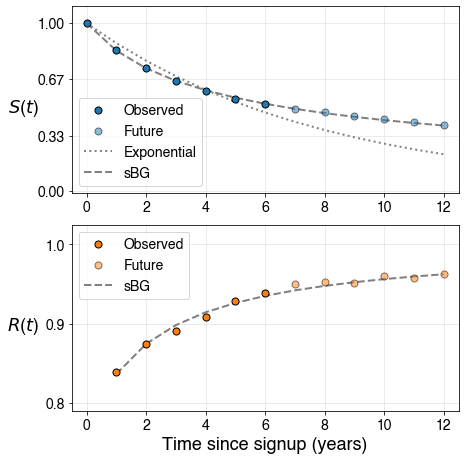

In [497]:
# plot retention forecasting
fig, axes = plt.subplots(2, 1, figsize = (6.5, 6.5))

axes[0].scatter(x[:limit], s[:limit], s=50, c=colors[0], edgecolors='k', label='Observed', zorder=2)
axes[0].scatter(x[limit:], s[limit:], s=50, c=colors[0], edgecolors='k', alpha=0.5, label='Future', zorder=2)
axes[0].plot(pred_exp['Time'], pred_exp['Retention'], ':', linewidth=2, c='gray', zorder=1, label='Exponential')
axes[0].plot(pred_sBG['Time'], pred_sBG['Retention'], '--', linewidth=2, c='gray', zorder=1, label='sBG')
axes[0].set_xlim(-0.5, 12.5)
axes[0].set_ylim(-0.01,1.1)
axes[0].set_yticks([0, 0.33, 0.67, 1.0])
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_ylabel('$S$($t$)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[0].get_yaxis().set_label_coords(-0.125,0.4)

axes[1].scatter(x[:limit], r[:limit], s=50, c=colors[1], edgecolors='k', label='Observed', zorder=2)
axes[1].scatter(x[limit:], r[limit:], s=50, c=colors[1], edgecolors='k', alpha=0.5, label='Future', zorder=2)
axes[1].plot(pred_sBG['Time'], pred_sBG['Retention_t'], '--', linewidth=2, c='gray', zorder=1, label='sBG')
axes[1].legend(loc=2, prop={'size': 14, 'family':'Helvetica'})
axes[1].set_xlim(-0.5, 12.5)
axes[1].set_ylim(0.79,1.025)
axes[1].set_yticks([0.8, 0.9, 1.0])
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylabel('$R$($t$)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[1].get_yaxis().set_label_coords(-0.125,0.4)

handles, labels = axes[0].get_legend_handles_labels()
handles = [handles[2], handles[3], handles[0], handles[1]]
labels = [labels[2], labels[3], labels[0], labels[1]]
axes[0].legend(handles, labels, loc=3, prop={'size': 14, 'family':'Helvetica'})

handles, labels = axes[1].get_legend_handles_labels()
handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]
axes[1].legend(handles, labels, loc=2, prop={'size': 14, 'family':'Helvetica'})


plt.xlabel('Time since signup (years)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# turn grid on
axes[0].grid(color=(.9, .9, .9)), axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)), axes[1].set_axisbelow(True)

figure_name = './Images/Figures/retention.png' 
plt.tight_layout()
# plt.subplots_adjust(hspace = 0.14)
plt.gcf().subplots_adjust(left=0.15)
plt.savefig(figure_name, dpi = 500)
plt.show()

$$R(t) =  \dfrac{\beta + t + 1}{\alpha + \beta + t + 1} \qquad (\textbf{2})$$

$$E[LTV] = CF \cdot \sum_{t=0}^{\infty} \dfrac{S(t)}{(1+d)^t} \qquad (\textbf{3})$$

$$E[LTV] = \sum_{t=0}^{\infty} \left( \dfrac{CF}{(1+d)^t} \cdot \prod_{i=1}^{t}{r_i} \right) \qquad (\textbf{3})$$

$$E[LTV] = \sum_{t=0}^{\infty} \dfrac{CF}{(1+d)^t} \cdot \sum_{t=0}^{\infty} S(t) $$

$$E[LTV] = CF \cdot \sum_{t=0}^{\infty} \dfrac{S(t)}{(1+d)^t} \qquad (\textbf{4}) $$

In [421]:
# create models based on fits

x = np.arange(0, 26, 1)
d = 0.10

# shifted beta geometric
pred_sBG = pd.DataFrame({'Time': x,
                         'Retention_t': sBG_function(x, popt_sBG[0], popt_sBG[1])})
pred_sBG['Retention_t'].iloc[0] = np.nan

# create overall retention (survival) column
pred_sBG['Retention'] = pred_sBG['Retention_t'].cumprod()
pred_sBG['Retention'].iloc[0] = 1

# calculate time-discounted customer lifetime column
pred_sBG['Retention_disc'] = pred_sBG['Retention']/((1 + d)** pred_sBG['Time'])

# calculate customer lifetime as area under survival curve
# pred_sBG['Retention_cumsum'] = pred_sBG['Retention'].cumsum()
pred_sBG['Retention_disc_cumsum'] = pred_sBG['Retention_disc'].cumsum() - 1

# check result
pred_sBG

,Time,Retention_t,Retention,Retention_disc,Retention_disc_cumsum
0,0,nan,1.000,1.000,0.000
1,1,0.836,0.836,0.760,0.760
2,2,0.874,0.731,0.604,1.365
3,3,0.898,0.657,0.493,1.858
4,4,0.914,0.601,0.410,2.268
5,5,0.926,0.556,0.345,2.614
6,6,0.935,0.520,0.293,2.907
7,7,0.942,0.490,0.251,3.159
8,8,0.948,0.464,0.216,3.375
9,9,0.952,0.442,0.187,3.562


In [484]:
# with first 6 years of data, what's expected lifetime using average churn rate?
1/(1-pred_sBG['Retention_t'][1:7].mean())

9.74289866672045

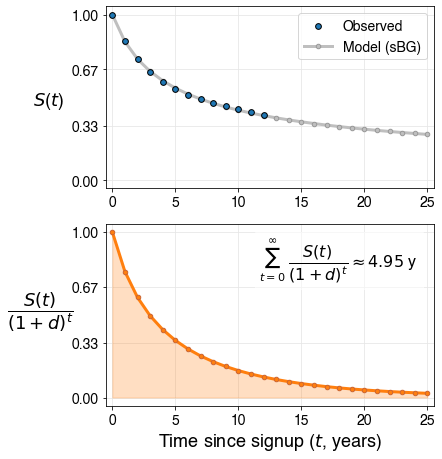

In [488]:
# plot retention forecasting
fig, axes = plt.subplots(2, 1, figsize = (6.5, 6.5))

axes[0].scatter(x[:13], s[:13], s=33, c=colors[0], edgecolors='k', label='Observed', zorder=2)
axes[0].plot(pred_sBG['Time'], pred_sBG['Retention'], marker='.', markersize=9, markeredgecolor=(0.6, 0.6, 0.6), linewidth=3, c=(0.75, 0.75, 0.75), zorder=1, label='Model (sBG)')
axes[0].set_xlim(-0.5, 25.5)
axes[0].set_ylim(-0.05,1.05)
axes[0].set_yticks([0, 0.33, 0.67, 1.0])
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_ylabel('$S$($t$)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[0].get_yaxis().set_label_coords(-0.175,0.425)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[1], handles[0]], [labels[1], labels[0]], loc=1, prop={'size': 14, 'family':'Helvetica'})

axes[1].plot(pred_sBG['Time'], pred_sBG['Retention_disc'], marker='.', markersize=9, markeredgecolor=(0.8, 0.4, 0.2), linewidth=3, c=colors[1], zorder=2) #, label='sBG')
axes[1].set_xlim(-0.5, 25.5)
axes[1].set_ylim(-0.05, 1.05)
axes[1].set_yticks([0, 0.33, 0.67, 1.0])
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylabel(r"$\dfrac{S(t)}{(1+d)^t}$", fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[1].get_yaxis().set_label_coords(-0.2,0.4)
axes[1].fill_between(pred_sBG['Time'], pred_sBG['Retention_disc'], color=colors[1], alpha=0.25)

# text box
factor = 9.65
props = dict(boxstyle='square', facecolor='white', edgecolor='white', alpha=0.5)
axes[1].text(0.525, 0.42, '$\sum_{t=0}^{\infty} \; \dfrac{S(t)}{(1+d)^t} \\approx 4.95 \; $y', transform=ax.transAxes, fontsize=16, fontname='Helvetica', verticalalignment='top', bbox=props)
# axes[1].text(factor*0.525, factor*0.3875, '$\sum_{t=0}^{\infty} \; \dfrac{S(t)}{(1+d)^t} \\approx 4.95 \; $y', transform=ax.transAxes, fontsize=16, fontname='Helvetica', verticalalignment='top', bbox=props)

plt.xlabel('Time since signup ($t$, years)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# turn grid on
axes[0].grid(color=(.9, .9, .9)), axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)), axes[1].set_axisbelow(True)

figure_name = './Images/Figures/retention_discounted.png' 
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.25, top=0.975, right=0.95) #, wspace=0.1)
# plt.savefig(figure_name, dpi = 500)
plt.show()

## Simulate users vs. time with viral growth + retention/churn

In [27]:
# create x-axis (time, days)
x = np.arange(0,1000,1)

# create viral coefficient data
min_k = 0.5
max_k = 2.0
width = 250
center = 500
viral_coeff = (max_k - min_k)*np.exp(-((x - center) / width)**2) + min_k
# viral_coeff = np.ones(len(x))*0.5 # constant, low viral coefficient

# create cycle time data
decay_rate = 0.005
start_cycle_time = 20
end_cycle_time = 5
cycle_time = (start_cycle_time - end_cycle_time)*np.exp(-x*decay_rate) + end_cycle_time
# cycle_time = np.ones(len(x))*20 # constant, long cycle time

# create retention rate change data
decay_rate = 0.005
end_retention = 0.6
retention_rate =  -end_retention*np.exp(-x*decay_rate-0.25) + end_retention
# retention_rate = np.ones(len(x))*0.15 # constant, low retention rate

# create resurrection rate change data 
decay_rate = 0.005
end_resurrection = 0.01
resurrection_rate =  -end_resurrection*np.exp(-x*decay_rate-0.225) + end_resurrection
# resurrection_rate = np.ones(len(x))*0.002 # constant, low resurrection rate

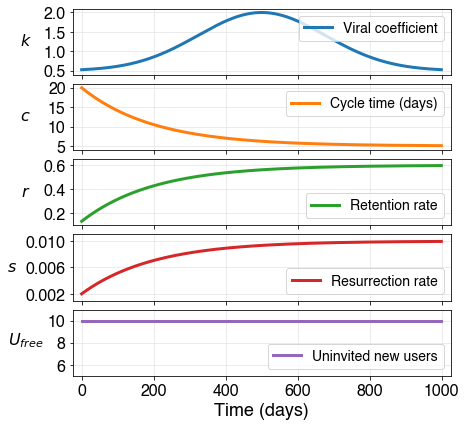

In [28]:
# plot inputs

# inputs
fig, axes = plt.subplots(5, 1, figsize = (7,6))

axes[0].plot(x, viral_coeff, linewidth=3, c=colors[0], label='Viral coefficient')
axes[0].legend(loc=1, prop={'size': 14, 'family':'Helvetica'})
axes[0].set_xlim(-25,1025)
axes[0].set_ylim(0.4,2.1)
axes[0].set_yticks([0.5, 1.0, 1.5, 2])
axes[0].set_ylabel(r'$k$', size=16, fontname='Helvetica', fontweight='bold', rotation=0)
axes[0].axes.xaxis.set_ticklabels([])
axes[0].get_yaxis().set_label_coords(-0.125,0.4)
axes[0].tick_params(axis='both', which='major', labelsize=16)

axes[1].plot(x, cycle_time, linewidth=3, c=colors[1], label='Cycle time (days)')
axes[1].legend(loc=1, prop={'size': 14, 'family':'Helvetica'})
axes[1].set_xlim(-25,1025)
axes[1].set_ylim(4,21)
axes[1].set_ylabel(r'$c$', size=16, fontname='Helvetica', fontweight='bold', rotation=0)
axes[1].axes.xaxis.set_ticklabels([])
axes[1].set_yticks([5, 10, 15, 20])
axes[1].get_yaxis().set_label_coords(-0.125,0.4)
axes[1].tick_params(axis='both', which='major', labelsize=16)

axes[2].plot(x, retention_rate, linewidth=3, c=colors[2], label='Retention rate')
axes[2].legend(prop={'size': 14, 'family':'Helvetica'})
axes[2].set_xlim(-25,1025)
axes[2].set_ylim(0.10,0.65)
axes[2].set_ylabel(r'$r$', size=16, fontname='Helvetica', fontweight='bold', rotation=0)
axes[2].axes.xaxis.set_ticklabels([])
axes[2].set_yticks([0.2, 0.4, 0.6])
axes[2].get_yaxis().set_label_coords(-0.125,0.4)
axes[2].tick_params(axis='both', which='major', labelsize=16)

axes[3].plot(x, resurrection_rate, linewidth=3, c=colors[3], label='Resurrection rate')
axes[3].legend(prop={'size': 14, 'family':'Helvetica'})
axes[3].set_xlim(-25,1025)
axes[3].set_ylim(0.001,0.011)
axes[3].set_ylabel(r'$s$', size=16, fontname='Helvetica', fontweight='bold', rotation=0)
axes[3].axes.xaxis.set_ticklabels([])
axes[3].set_yticks([0.002, 0.006, 0.01])
axes[3].get_yaxis().set_label_coords(-0.16,0.4)
axes[3].tick_params(axis='both', which='major', labelsize=16)

axes[4].plot(x, np.ones(len(x))*10, linewidth=3, c=colors[4], label='Uninvited new users')
axes[4].legend(loc=4, prop={'size': 14, 'family':'Helvetica'})
axes[4].set_xlim(-25,1025)
axes[4].set_ylim(5,11)
axes[4].set_ylabel(r'$U_{free}$', size=16, fontname='Helvetica', fontweight='bold', rotation=0)
axes[4].set_yticks([6, 8, 10])
axes[4].get_yaxis().set_label_coords(-0.125,0.4)
axes[4].tick_params(axis='both', which='major', labelsize=16)

plt.xlabel('Time (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

## set axis tick label properties
plt.setp(ax.get_xticklabels(), fontsize=14, fontname = 'Helvetica')
plt.setp(ax.get_yticklabels(), fontsize=14, fontname = 'Helvetica')

# turn grid on
axes[0].grid(color=(.9, .9, .9)), axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)), axes[1].set_axisbelow(True)
axes[2].grid(color=(.9, .9, .9)), axes[2].set_axisbelow(True)
axes[3].grid(color=(.9, .9, .9)), axes[3].set_axisbelow(True)
axes[4].grid(color=(.9, .9, .9)), axes[4].set_axisbelow(True)

figure_name = './Images/Figures/Growth modeling/growth_inputs.png' 
plt.subplots_adjust(hspace = 0.14)
plt.gcf().subplots_adjust(top=0.975, bottom=0.125, left=0.15)
# plt.savefig(figure_name, dpi = 500)
plt.show()

## Calculating user base vs. time

In [29]:
# gather inputs for user growth
growth_input = pd.DataFrame({'Viral coefficient': viral_coeff, 
                             'Cycle time': cycle_time, 
                             'Retention rate': retention_rate,
                             'Resurrection rate': resurrection_rate})

**New users** at time $t$ is equal to product of new users, retention rate, and viral coefficient from one cycle ago, plus "free" users who discover product independently: 
<br><br>
$\qquad$ $U_{new}(t) = U_{new}(t-c(t)) \times r(t-c(t)) \times k(t-c(t)) \space + U_{free}(t)$ $\qquad$ $(\textbf{2})$
<br><br>
(assumes invites only come from retained users)
<br><br><br>
**Total active users** at time $t$ is equal to active users from previous interval, plus previous interval's new users times retention rate, plus previous interval's lost users times resurrection rate:
<br><br>
$\qquad$ $U_{active}(t) = U_{active}(t-1) + U_{new}(t-1) \times r(t-1) + U_{lost}(t-1) \times s(t-1)$ $\qquad$ $(\textbf{3})$
<br><br>
(assumes entire churn happens after first day)
<br><br><br>
**Total lost users** at time $t$ is equal to lost users from previous interval plus churn (previous interval's new users times churn rate) minus resurrection (previous interval's lost users times resurrection rate):
<br><br>
$\qquad$ $U_{lost}(t) = U_{lost}(t-1) + U_{new}(t-1) \times (1 - r(t-1)) - U_{lost}(t-1) \times s(t-1)$ $\qquad$ $(\textbf{4})$

In [24]:
# create growth table 
free_users = 10
# starting_users = free_users
starting_users = 10

growth_output = pd.DataFrame({'New': starting_users,
                              'Active': 0,
                              'Lost': 0}, 
                               index=[0])

for index, row in growth_input.iterrows():
    
    cycle_time_int = int(round(growth_input['Cycle time'].iloc[index], 0))

    if len(growth_output) >= cycle_time_int:
        growth_output_temp = pd.DataFrame({'New': int(free_users + growth_output['New'].iloc[index-cycle_time_int] * growth_input['Retention rate'].iloc[index-cycle_time_int] * growth_input['Viral coefficient'].iloc[index-cycle_time_int]),
                                           'Active': round(growth_output['Active'].iloc[index] + growth_output['New'].iloc[index]*growth_input['Retention rate'].iloc[index] + growth_output['Lost'].iloc[index]*growth_input['Resurrection rate'].iloc[index], 0),
                                           'Lost': round(growth_output['Lost'].iloc[index] + growth_output['New'].iloc[index]*(1 - growth_input['Retention rate'].iloc[index]) - growth_output['Lost'].iloc[index]*growth_input['Resurrection rate'].iloc[index], 0)}, 
                                            index=[index+1])

    else:
        growth_output_temp = pd.DataFrame({'New': free_users,
                                           'Active': round(growth_output['Active'].iloc[index] + growth_output['New'].iloc[index]*growth_input['Retention rate'].iloc[index] + growth_output['Lost'].iloc[index]*growth_input['Resurrection rate'].iloc[index], 0),
                                           'Lost': round(growth_output['Lost'].iloc[index] + growth_output['New'].iloc[index]*(1 - growth_input['Retention rate'].iloc[index]) - growth_output['Lost'].iloc[index]*growth_input['Resurrection rate'].iloc[index], 0)}, 
                                            index=[index+1])
        
    growth_output = growth_output.append(growth_output_temp)

growth = pd.concat([growth_input, growth_output], axis=1)

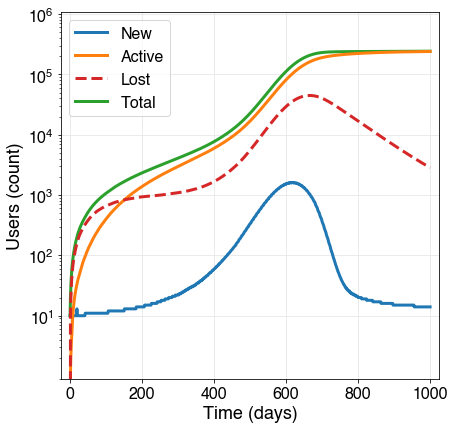

In [25]:
# plot user growth output

fig, axes = plt.subplots(1, 1, figsize = (7,6))
x = growth.index
y1 = growth['New']
y2 = growth['Active']
y3 = growth['Lost']
y4 = growth['New'] + growth['Active'] + growth['Lost']

axes.plot(x, y1, linewidth=3, c=colors[0], zorder=1, label='New')
axes.plot(x, y2, linewidth=3, c=colors[1], zorder=3, label='Active')
axes.plot(x, y3, '--', linewidth=3, c=colors[3], zorder=4, label='Lost')
axes.plot(x, y4, linewidth=3, c=colors[2], zorder=2, label='Total')
axes.legend(loc=2, prop={'size': 16, 'family': 'Helvetica'})
axes.set_xlim(-25,1025)
axes.set_ylabel('Users (count)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
# axes.set_yscale('symlog')
axes.set_yscale('log')
axes.set_ylim([0.9, 1100000])
axes.set_yticks([10, 100, 1000, 10000, 100000, 1000000])

## set axis tick label properties
plt.xlabel('Time (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.setp(axes.get_xticklabels(), fontsize=16, fontname = 'Helvetica')
plt.setp(axes.get_yticklabels(), fontsize=16, fontname = 'Helvetica')
axes.grid(color=(.9, .9, .9)), axes.set_axisbelow(True)

figure_name = './Images/Figures/Growth modeling/growth_output.png' 
plt.subplots_adjust(hspace = 0.05)
plt.gcf().subplots_adjust(top=0.975, bottom=0.125, left=0.15)
# plt.savefig(figure_name, dpi = 500)
plt.show()

In [ ]:
# growth_bl = growth
# growth_k_0p5 = growth
# growth_c_20 = growth
# growth_r_0p15 = growth 
# growth_s_0p002 = growth
# growth_Ufree_0 = growth
# growth_Ufree_1 = growth
# growth_Ufree_2 = growth

In [158]:
# growth_bl.to_csv('./Data/growth_bl.csv', index=False)
# growth_k_0p5.to_csv('./Data/growth_k_0.5.csv', index=False)
# growth_c_20.to_csv('./Data/growth_c_20.csv', index=False)
# growth_r_0p15.to_csv('./Data/growth_r_0.15.csv', index=False)
# growth_s_0p002.to_csv('./Data/growth_s_0.002.csv', index=False)
# growth_Ufree_0.to_csv('./Data/growth_Ufree_0.csv', index=False)
# growth_Ufree_1.to_csv('./Data/growth_Ufree_1.csv', index=False)
# growth_Ufree_2.to_csv('./Data/growth_Ufree_2.csv', index=False)

In [26]:
# # display terminal values across cases
# print('baseline: \n', growth_bl.iloc[-2, 2:], '\n')
# print('k=0.5: \n', growth_k_0p5.iloc[-2, 2:], '\n')
# print('c=20: \n', growth_c_20.iloc[-2, 2:], '\n')
# print('r=0.15: \n', growth_r_0p15.iloc[-2, :], '\n')
# print('s=0.002: \n', growth_s_0p002.iloc[-2, 2:], '\n')
# print('Ufree=0: \n', growth_Ufree_0.iloc[-2, :], '\n')
# print('Ufree=1: \n', growth_Ufree_1.iloc[-2, :], '\n')

In [27]:
# read in growth files
growth_bl = pd.read_csv('./Data/growth_bl.csv')
growth_k_0p5 = pd.read_csv('./Data/growth_k_0.5.csv')
growth_c_20 = pd.read_csv('./Data/growth_c_20.csv')
growth_r_0p5 = pd.read_csv('./Data/growth_r_0.15.csv')
growth_s_0p002 = pd.read_csv('./Data/growth_s_0.002.csv')
growth_Ufree_0 = pd.read_csv('./Data/growth_Ufree_0.csv')
growth_Ufree_1 = pd.read_csv('./Data/growth_Ufree_1.csv')
growth_Ufree_2 = pd.read_csv('./Data/growth_Ufree_2.csv')

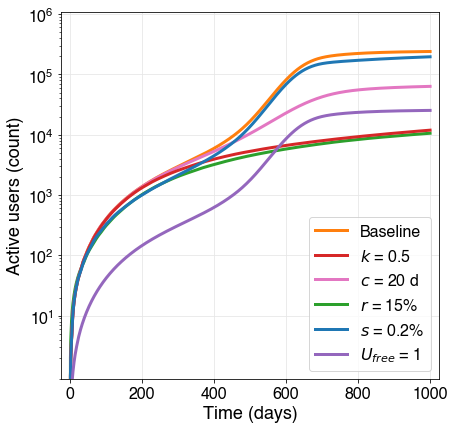

In [28]:
# plot growth across various cases

fig, axes = plt.subplots(1, 1, figsize = (7,6))
x = growth.index

y1 = growth_bl['Active']
y2 = growth_k_0p5['Active']
y3 = growth_c_20['Active']
y4 = growth_r_0p5['Active']
y5 = growth_s_0p002['Active']
y6 = growth_Ufree_0['Active'] 
y7 = growth_Ufree_1['Active']
# y7 = growth_Ufree_2['Active']

axes.plot(x, y1, linewidth=3, c=colors[1], zorder=1, label='Baseline')
axes.plot(x, y2, linewidth=3, c=colors[3], zorder=4, label='$k$ = 0.5')
axes.plot(x, y3, linewidth=3, c=colors[6], zorder=3, label='$c$ = 20 d')
axes.plot(x, y4, linewidth=3, c=colors[2], zorder=2, label='$r$ = 15%')
axes.plot(x, y5, linewidth=3, c=colors[0], zorder=5, label='$s$ = 0.2%')
# axes.plot(x, y6, linewidth=3, c=colors[5], zorder=6, label='$U_{free}$ = 0')
axes.plot(x, y7, linewidth=3, c=colors[4], zorder=7, label='$U_{free}$ = 1')

axes.legend(loc=4, prop={'size': 16, 'family': 'Helvetica'})
axes.set_xlim(-25,1025)
axes.set_ylabel('Active users (count)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
# axes.set_yscale('symlog')
axes.set_yscale('log')
axes.set_ylim([0.9, 1100000])
axes.set_yticks([10, 100, 1000, 10000, 100000, 1000000])

## set axis tick label properties
plt.xlabel('Time (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.setp(axes.get_xticklabels(), fontsize=16, fontname = 'Helvetica')
plt.setp(axes.get_yticklabels(), fontsize=16, fontname = 'Helvetica')
axes.grid(color=(.9, .9, .9)), axes.set_axisbelow(True)

figure_name = './Images/Figures/Growth modeling/growth_various_cases.png' 
plt.subplots_adjust(hspace = 0.05)
plt.gcf().subplots_adjust(top=0.975, bottom=0.125, left=0.15)
plt.savefig(figure_name, dpi = 500)
plt.show()

# Profitability

Revenue $\,$ = $\,$ Total number of users $\,$ $\times$ $\,$ Average revenue per user $ \quad (\textbf{2})$

<!-- $R = n_{users} \times ARPU$ -->

$R = n \times \dfrac{1}{n} \sum \limits_{i=1}^{n} {R_i}  \qquad (\textbf{2})$


Average revenue per user $\,$ = $\,$ Average number of purchases $\,$ $\times$ $\,$ Average purchase amount $ \quad (\textbf{3})$

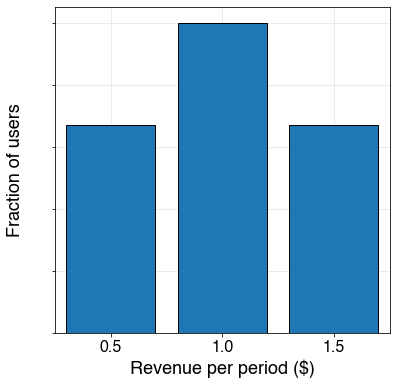

In [63]:
# create customers vs. revenue histogram in discretized limit
x = [0.5, 1, 1.5]
y = [0.67, 1, 0.67]

fig, axes = plt.subplots(1, 1, figsize = (6,6))
plt.bar(x, y, edgecolor='k', width=0.4)

plt.xlabel('Revenue per period ($)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels([])
plt.xticks([0, 0.50, 1, 1.50])
plt.xlim(0.25, 1.75)
plt.setp(axes.get_xticklabels(), fontsize=16, fontname = 'Helvetica')
plt.setp(axes.get_yticklabels(), fontsize=16, fontname = 'Helvetica')
axes.grid(color=(.9, .9, .9)), axes.set_axisbelow(True)

figure_name = './Images/customers_vs_revenue_discrete.png' 
plt.savefig(figure_name, dpi = 500)

plt.show()

In [55]:
# create customers vs. revenue (gamma) distribution in continuous limit
from scipy.special import gamma
#gamma(5) # gamma(x) = (x-1)!
max_x = 40
x = np.arange(0,max_x,max_x/1000)
x2 = 4*x
theta = 2
k = 2
y = ((gamma(k)*theta**k)**-1)*(x2**(k-1))*np.exp(-x2/theta)

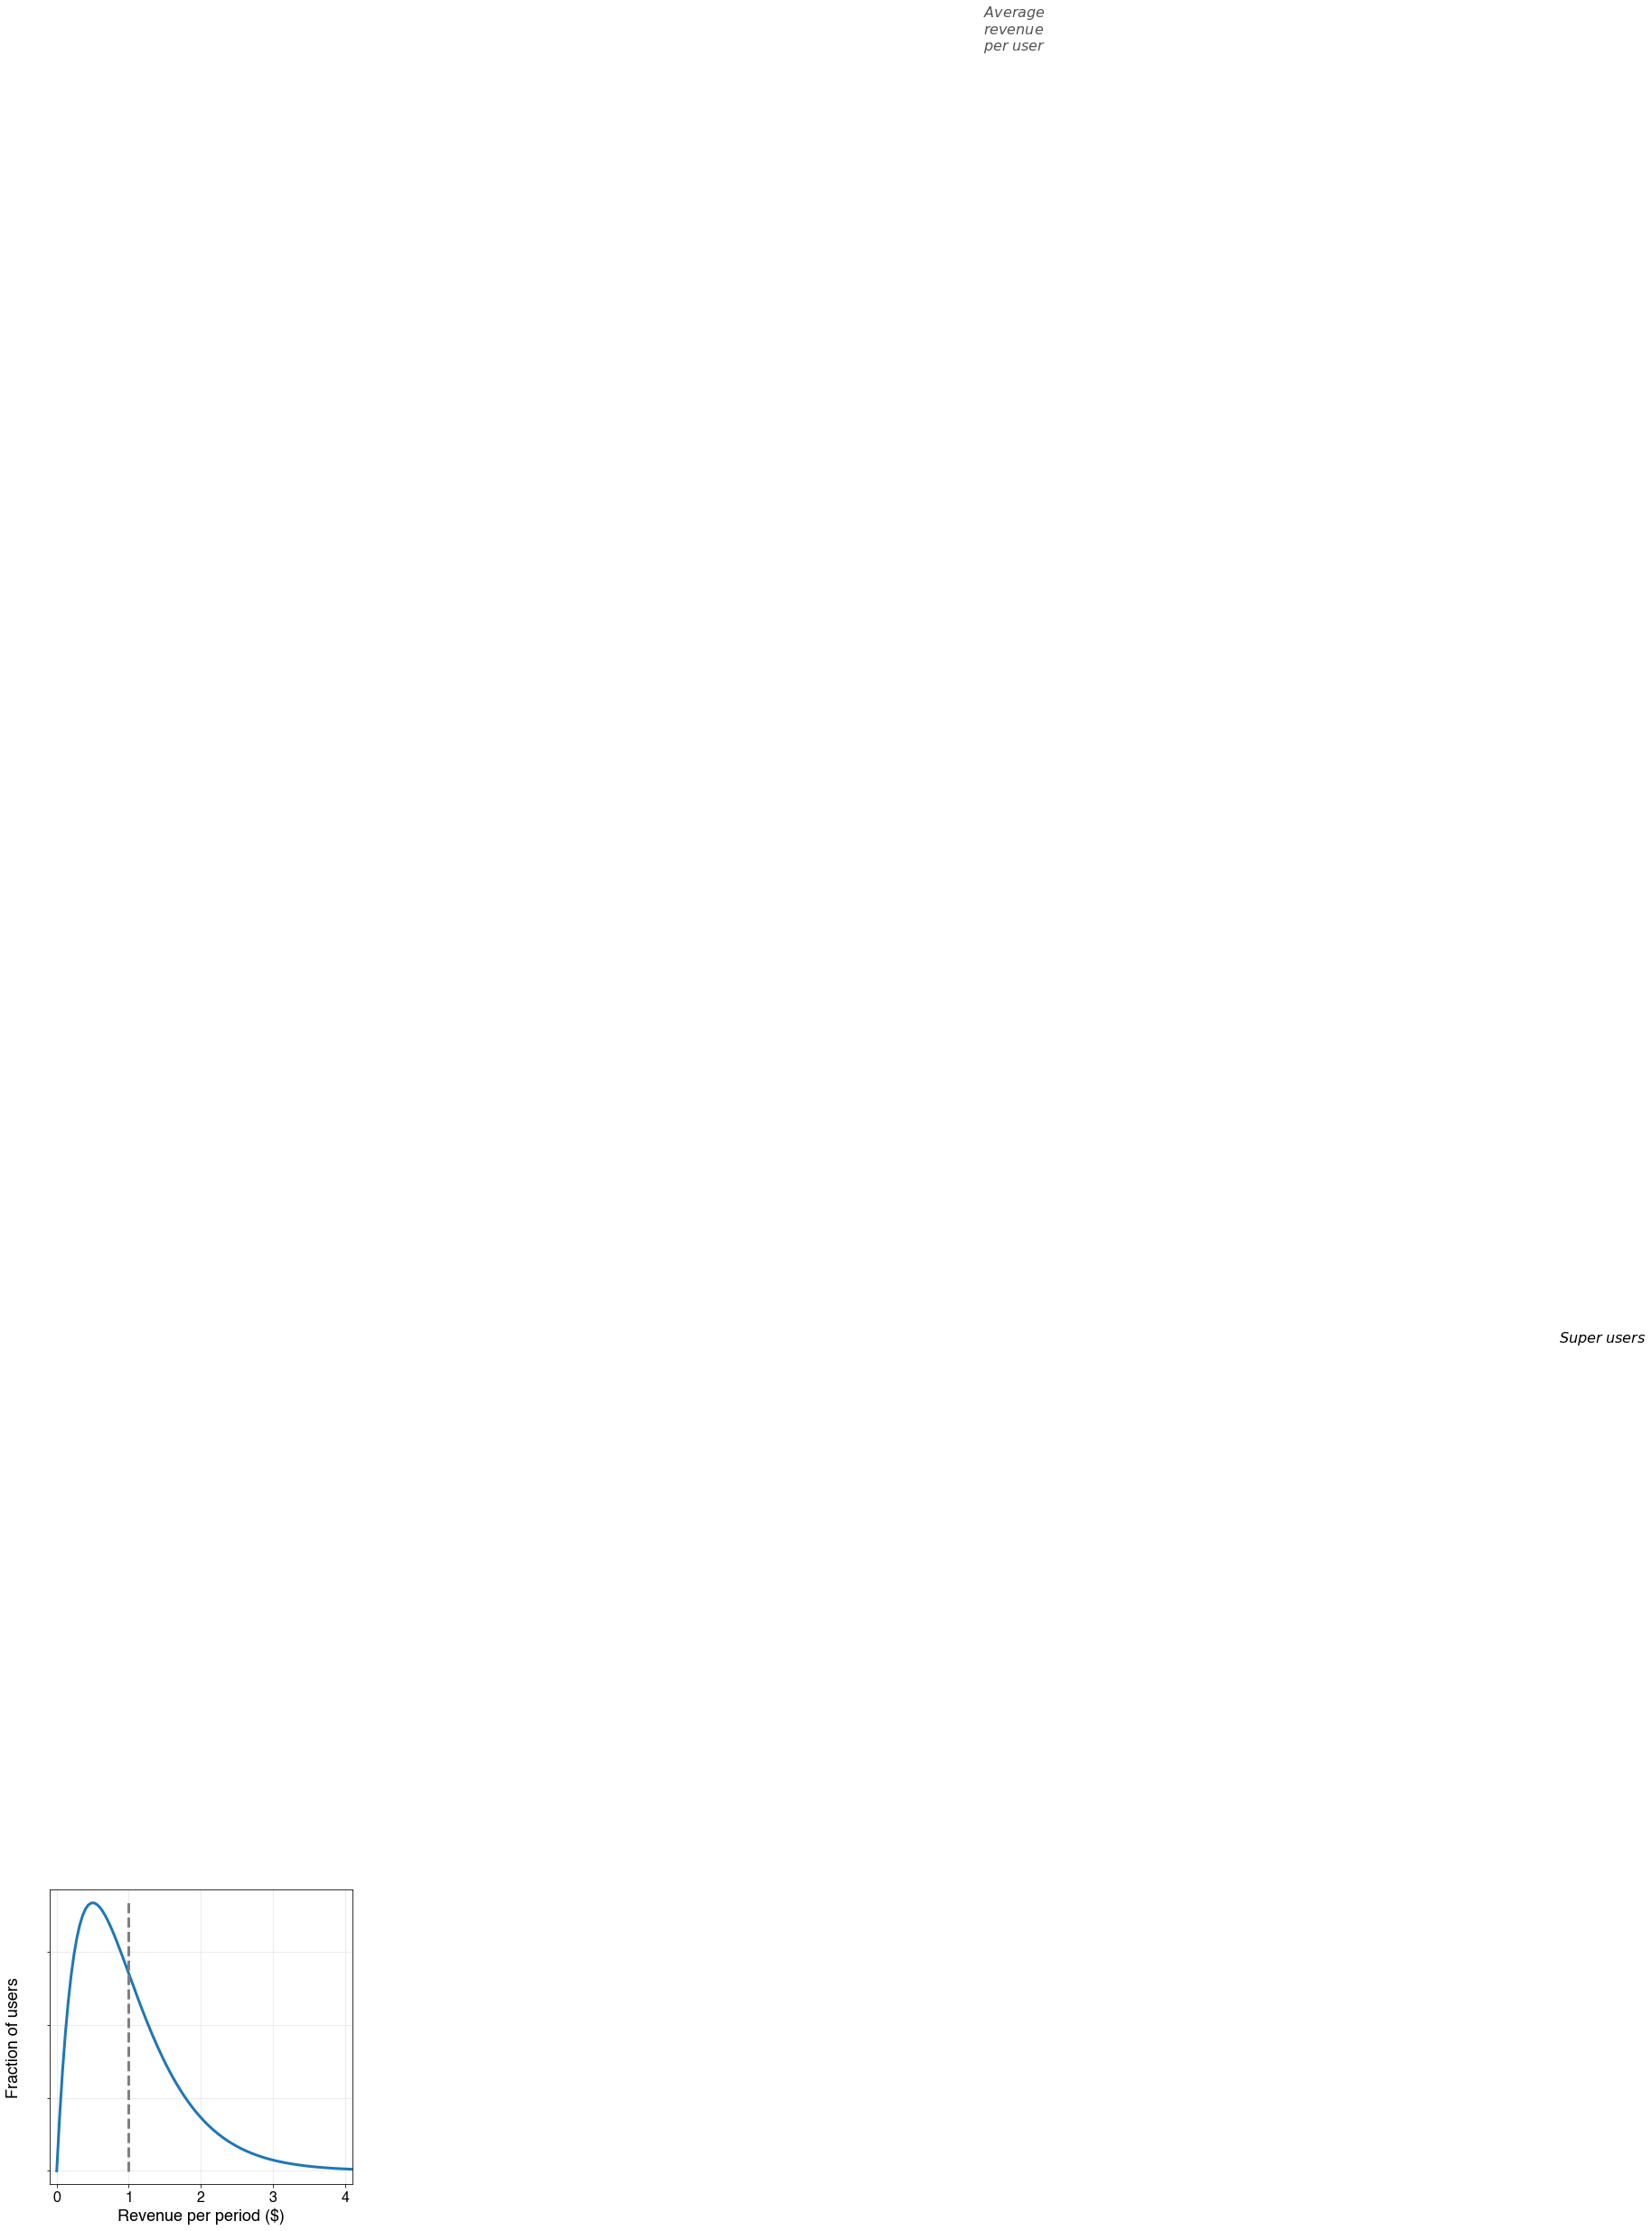

In [57]:
# plot customers vs. revenue
fig, axes = plt.subplots(1, 1, figsize = (6,6))
axes.plot(x, y*2, linewidth=3, c=colors[0], zorder=1) #, label='Baseline')
plt.axvline(k*theta/4, linewidth=3, linestyle='--', color='gray', zorder=2, ymin=0.045, ymax=0.965)
plt.xlabel('Revenue per period ($)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.yticks([0, 0.1, 0.2, 0.3])
axes.set_yticklabels([])
plt.xlim(-0.1,4.1)
plt.xticks([0, 1, 2, 3, 4])
plt.setp(axes.get_xticklabels(), fontsize=16, fontname = 'Helvetica')
plt.setp(axes.get_yticklabels(), fontsize=16, fontname = 'Helvetica')
axes.grid(color=(.9, .9, .9)), axes.set_axisbelow(True)

factor=6.25

# text box
props = dict(boxstyle='square', facecolor='white', edgecolor='white', alpha=0.33)
axes.text(factor*0.775, factor*0.425, '$Super$ $users$', transform=ax.transAxes, fontsize=16, fontname='Helvetica', verticalalignment='top', bbox=props)
axes.text(factor*0.475, factor*1.1, '$Average$ \n$revenue$ \n$per$ $user$', transform=ax.transAxes, color=(0.33,0.33,0.33), fontsize=16, fontname='Helvetica', verticalalignment='top', bbox=props)

figure_name = './Images/customers_vs_revenue.png' 
plt.savefig(figure_name, dpi = 500)
plt.show()

In [260]:
# create segmented customers vs. revenue distribution
max_x = 4
x = np.arange(0,max_x,max_x/100)
x2 = 4*x

theta_1 = 1.5
k_1 = 2

theta_2 = 2.5
k_2 = 2

theta_3 = 3.5
k_3 = 2

y1 = ((gamma(k_1)*theta_1**k_1)**-1)*(x2**(k_1-1))*np.exp(-x2/theta_1)
y2 = ((gamma(k_2)*theta_2**k_2)**-1)*(x2**(k_2-1))*np.exp(-x2/theta_2)
y3 = ((gamma(k_3)*theta_3**k_3)**-1)*(x2**(k_3-1))*np.exp(-x2/theta_3)

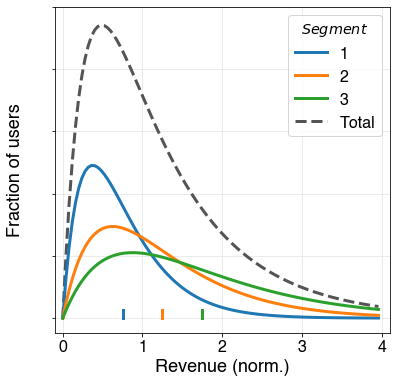

In [262]:
# plot segmented customers vs. revenue
fig, axes = plt.subplots(1, 1, figsize = (6,6))
axes.plot(x, y1, linewidth=3, c=colors[0], zorder=2, label='1')
axes.plot(x, y2, linewidth=3, c=colors[1], zorder=3, label='2')
axes.plot(x, y3, linewidth=3, c=colors[2], zorder=4, label='3')
axes.plot(x, y1+y2+y3, linewidth=3, c=(0.33, 0.33, 0.33), linestyle='--', zorder=1, label='Total')

# plot average revenue for each
plt.axvline(k_1*theta_1/4, linewidth=3, linestyle='-', color=colors[0], zorder=1, ymin=0.045, ymax=0.07)
plt.axvline(k_2*theta_2/4, linewidth=3, linestyle='-', color=colors[1], zorder=1, ymin=0.045, ymax=0.07)
plt.axvline(k_3*theta_3/4, linewidth=3, linestyle='-', color=colors[2], zorder=1, ymin=0.045, ymax=0.07)

plt.xlabel('Revenue (norm.)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
axes.set_yticklabels([])
plt.xlim(-0.1,4.1)
plt.xticks([0, 1, 2, 3, 4])
plt.setp(axes.get_xticklabels(), fontsize=16, fontname = 'Helvetica')
plt.setp(axes.get_yticklabels(), fontsize=16, fontname = 'Helvetica')
axes.grid(color=(.9, .9, .9)), axes.set_axisbelow(True)
l = plt.legend(loc=1, title='$Segment$', prop={'size': 16, 'family': 'Helvetica'})
plt.setp(l.get_title(),fontsize='x-large', fontname='Helvetica')

figure_name = './Images/customers_vs_revenue_segmented.png' 
plt.savefig(figure_name, dpi = 500)
plt.show()

In [78]:
# create active user definition table
revenue_per_user = pd.DataFrame({'Company': ['Facebook', 'Twitter', 'Uber', 'Square', 'Netflix', 'Amazon'],
                                 'Avg. revenue per user ($ per quarter)': [6.8, 4.9, 27.0, 7.5, 9.3, 242],
                                 'Revenue ($ billions per quarter)': ['17.7', '0.81', '3.0', '0.18', '1.7', '75'],
                                 'User count (millions)': ['2,600', '166', '111', '24', '182', '310'],
                                 'Notes': ['MAUs', 'DAUs', 'MAUs, Q4 2019', 'MAUs, Q4 2019 Cash App', 'MAUs', 'YAUs']})
#                                  'Notes': ['', '', 'Q4 2019', 'Q4 2019', '', '']})
revenue_per_user.style.hide_index()

Company,Avg. revenue per user ($ per quarter),Revenue ($ billions per quarter),User count (millions),Notes
Facebook,6.8,17.7,"2,600",MAUs
Twitter,4.9,0.81,166,DAUs
Uber,27,3.0,111,"MAUs, Q4 2019"
Square,7.5,0.18,24,"MAUs, Q4 2019 Cash App"
Netflix,9.3,1.7,182,MAUs
Amazon,242,75,310,YAUs


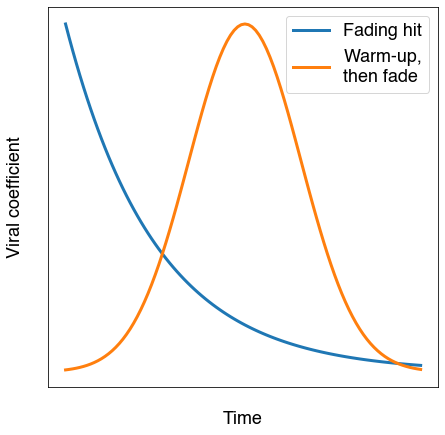

In [212]:
# create plots illustrating changes in viral coefficient over time
fig, axes = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 2*np.exp(-x/25)
y2 = (2/1)*np.exp(-0.1*((x-50)/7)**2)
plt.plot(x, y1, linewidth=3, label='Fading hit')
plt.plot(x, y2, linewidth=3, label='Warm-up,\nthen fade')
plt.xlabel('\nTime', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Viral coefficient\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])
l = plt.legend(prop={'size': 18})
plt.setp(l.texts, family='Helvetica')
plt.show()

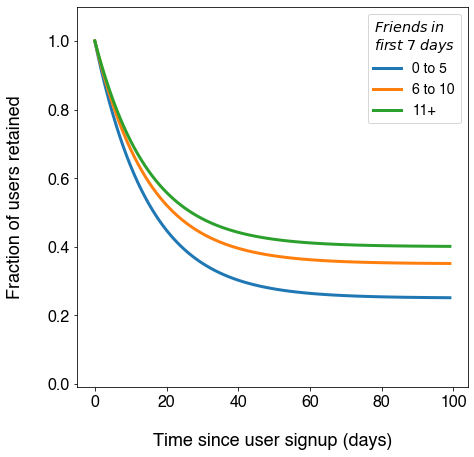

In [5]:
# create improving retention with increasing friends plots
plt.rcParams["font.family"] = "Helvetica"
fig, ax = plt.subplots(1, 1, figsize = (7,7))
x = np.arange(0,100,1)
y1 = 0.75*np.exp(-x/15) + 0.25
y2 = 0.65*np.exp(-x/15) + 0.35
y3 = 0.60*np.exp(-x/15) + 0.40
plt.plot(x, y1, linewidth=3, label='0 to 5')
plt.plot(x, y2, linewidth=3, label='6 to 10')
plt.plot(x, y3, linewidth=3, label='11+')
plt.xlabel('\nTime since user signup (days)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylabel('Fraction of users retained\n', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')
plt.ylim(-0.01,1.1)
ax.tick_params(axis='both', which='major', labelsize=16)
l = plt.legend(title='$Friends$ $in$ \n$first$ $7$ $days$', prop={'size': 14})
plt.setp(l.get_title(),fontsize='x-large', fontname='Helvetica')
plt.setp(l.texts, family='Helvetica')
plt.show()

## LTV

$$LTV = \sum_{t=0}^{n} \dfrac{CF_t}{(1+d)^t} \qquad (\textbf{3})$$

$$E[LTV] = \sum_{t=0}^{\infty} \left( \dfrac{CF}{(1+d)^t} \cdot \prod_{i=1}^{t}{r_i} \right) \qquad (\textbf{3})$$

In [5]:
# create active user definition table
company_values = pd.DataFrame({'Company': ['Facebook', 'Twitter', 'Uber', 'Square', 'Netflix', 'Amazon'],
                                'Earnings ($M)': ['4,902', '-124', '-2,946', '-106', '720', '2,535'],                                 
                                'Share price ($, 8/3/20)': ['252', '31.4', '31.2', '135', '499', '3,112'],
                                'Shares outstanding (M)': ['2,740', '785', '1,724', '363', '441', '499'],
                                'Market cap ($B)': ['718', '28.6', '53.8', '59.2', '220', '1,560'],
                                'Price to earnings': ['32', '-', '-', '-', '84.1', '120']})
company_values.style.hide_index()

Company,Earnings ($M),"Share price ($, 8/3/20)",Shares outstanding (M),Market cap ($B),Price to earnings
Facebook,"4,902",252,"2,740",718,32
Twitter,-124,31.4,785,28.6,-
Uber,"-2,946",31.2,"1,724",53.8,-
Square,-106,135,363,59.2,-
Netflix,720,499,441,220,84.1
Amazon,"2,535","3,112",499,"1,560",120
